In [1]:
pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
import numpy as np

cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col] = df[col].replace(0, np.nan)

print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
for col in cols:
    df[col] = df[col].fillna(df[col].median())

In [9]:
print(df['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Sakshi Wadekar\AppData\Local\Temp\ipykernel_20792\2415188723.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Glucose', data=df, palette='Set2')


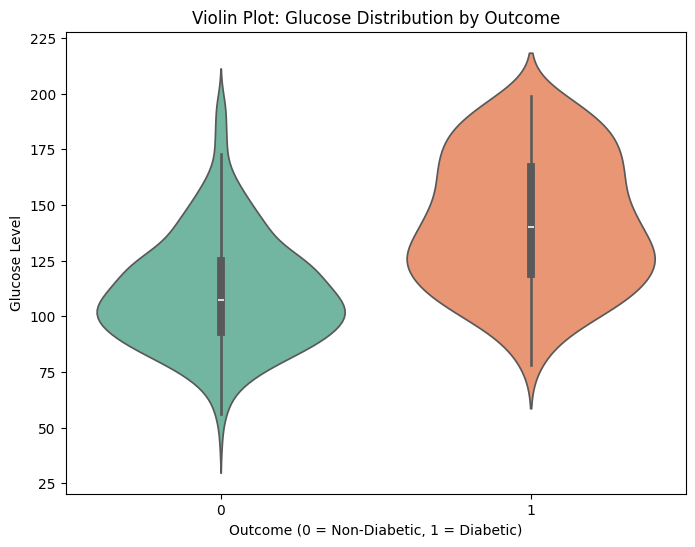

In [12]:
#Violin Plot: Glucose by outcome

plt.figure(figsize=(8,6))
sns.violinplot(x='Outcome', y='Glucose', data=df, palette='Set2')
plt.title("Violin Plot: Glucose Distribution by Outcome")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Glucose Level")
plt.show()

C:\Users\Sakshi Wadekar\AppData\Local\Temp\ipykernel_20792\1882966565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Outcome', y='BMI', data=df, palette='Set1')


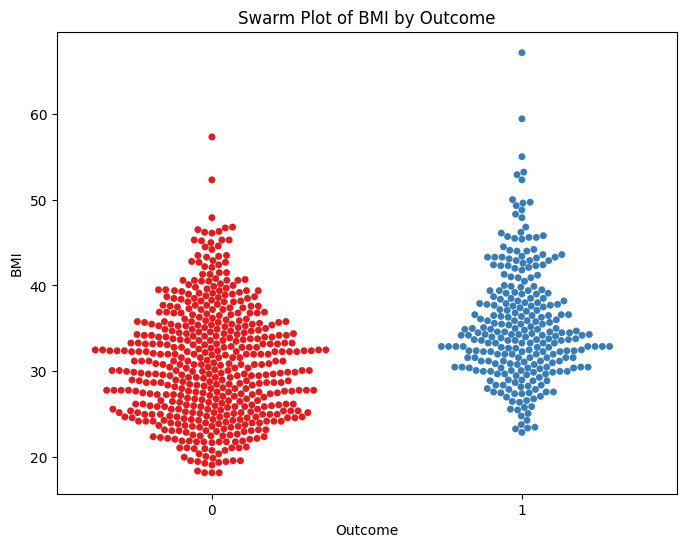

In [13]:
#Swarm Plot
plt.figure(figsize=(8,6))
sns.swarmplot(x='Outcome', y='BMI', data=df, palette='Set1')
plt.title('Swarm Plot of BMI by Outcome')
plt.show()

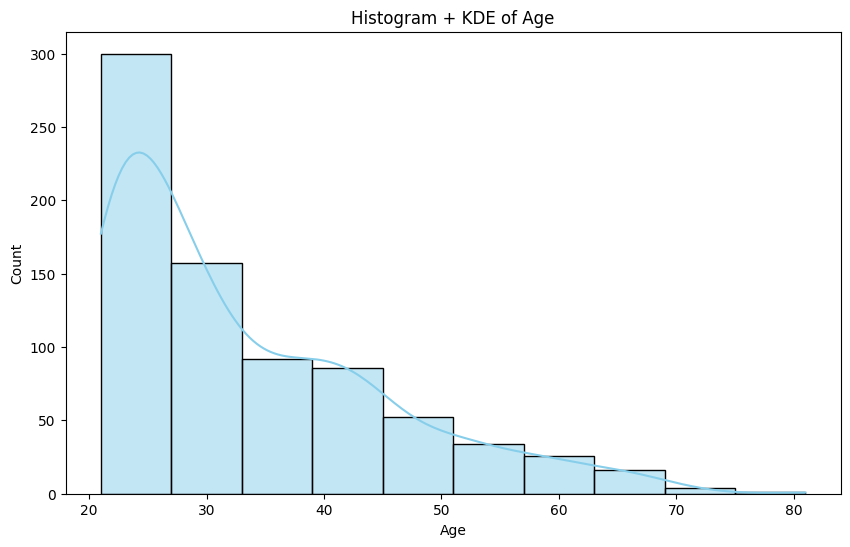

In [14]:
#Histogram + KDE Of age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=10, color='skyblue')
plt.title("Histogram + KDE of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

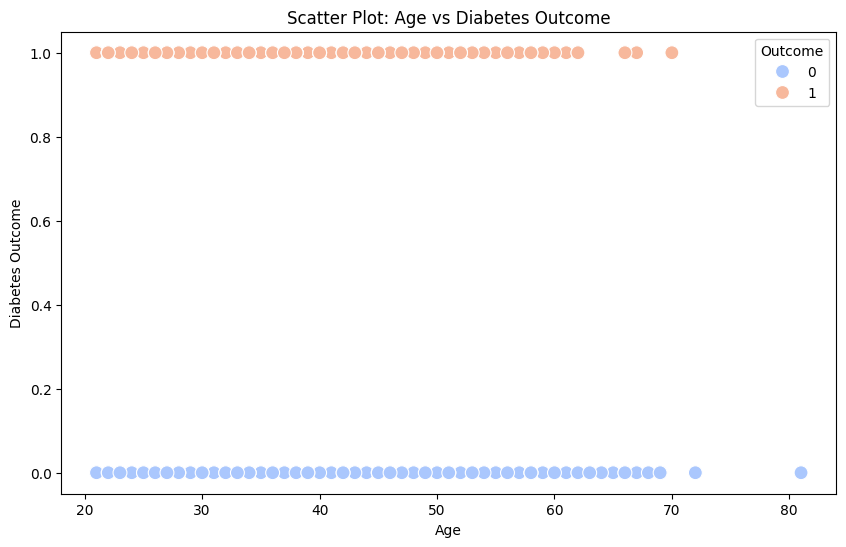

In [15]:
# Scatter Plot: Age vs Outcome (Diabetes)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Outcome', hue='Outcome', palette='coolwarm', s=100)
plt.title("Scatter Plot: Age vs Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Diabetes Outcome")
plt.show()

C:\Users\Sakshi Wadekar\AppData\Local\Temp\ipykernel_20792\1408180839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_diabetes_count, x='Age', y='Outcome', palette='viridis')


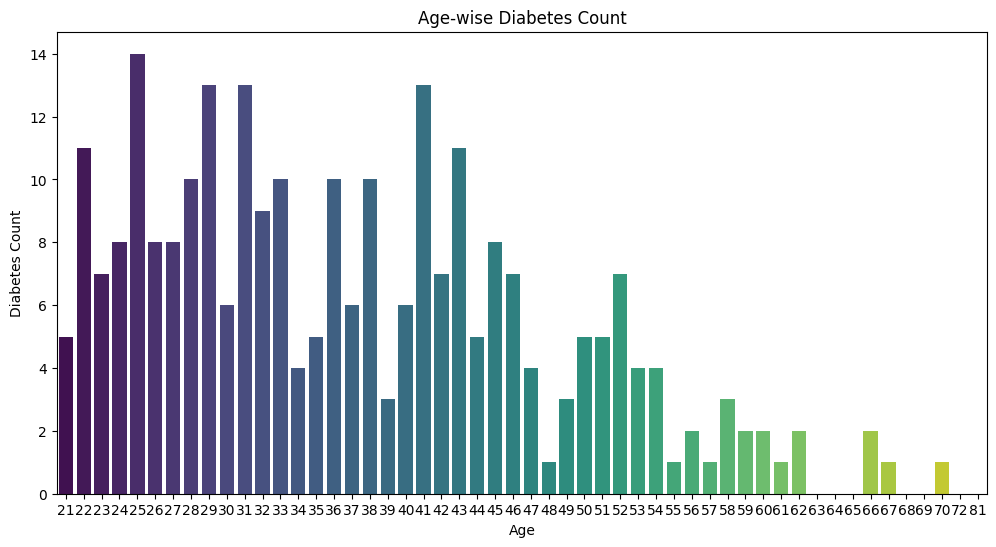

In [16]:
# Age-wise Diabetes Count

age_diabetes_count = df.groupby('Age')['Outcome'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=age_diabetes_count, x='Age', y='Outcome', palette='viridis')
plt.title("Age-wise Diabetes Count")
plt.xlabel("Age")
plt.ylabel("Diabetes Count")
plt.show()

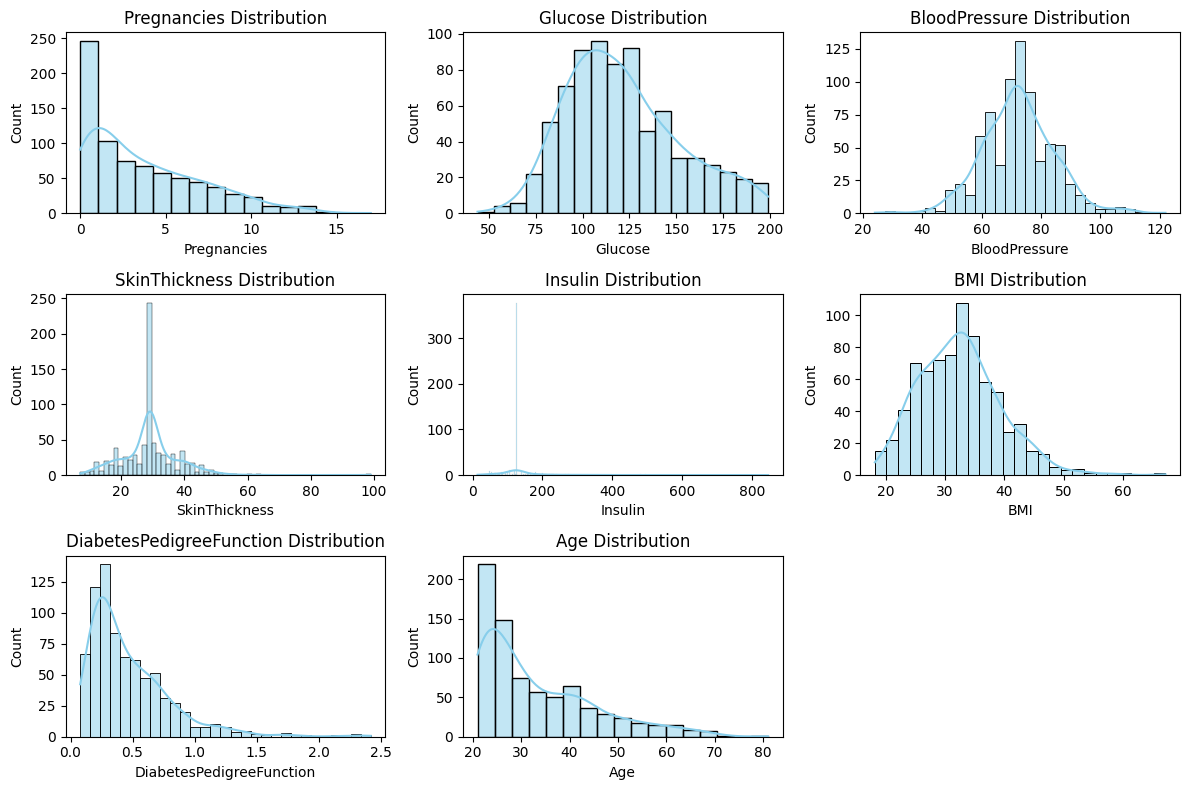

In [22]:
#Distribution Analysis

numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

C:\Users\Sakshi Wadekar\AppData\Local\Temp\ipykernel_20792\39979507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
C:\Users\Sakshi Wadekar\AppData\Local\Temp\ipykernel_20792\39979507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
C:\Users\Sakshi Wadekar\AppData\Local\Temp\ipykernel_20792\39979507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
C:\Users\Sakshi Wadekar\AppData\Local\Temp\ipykernel

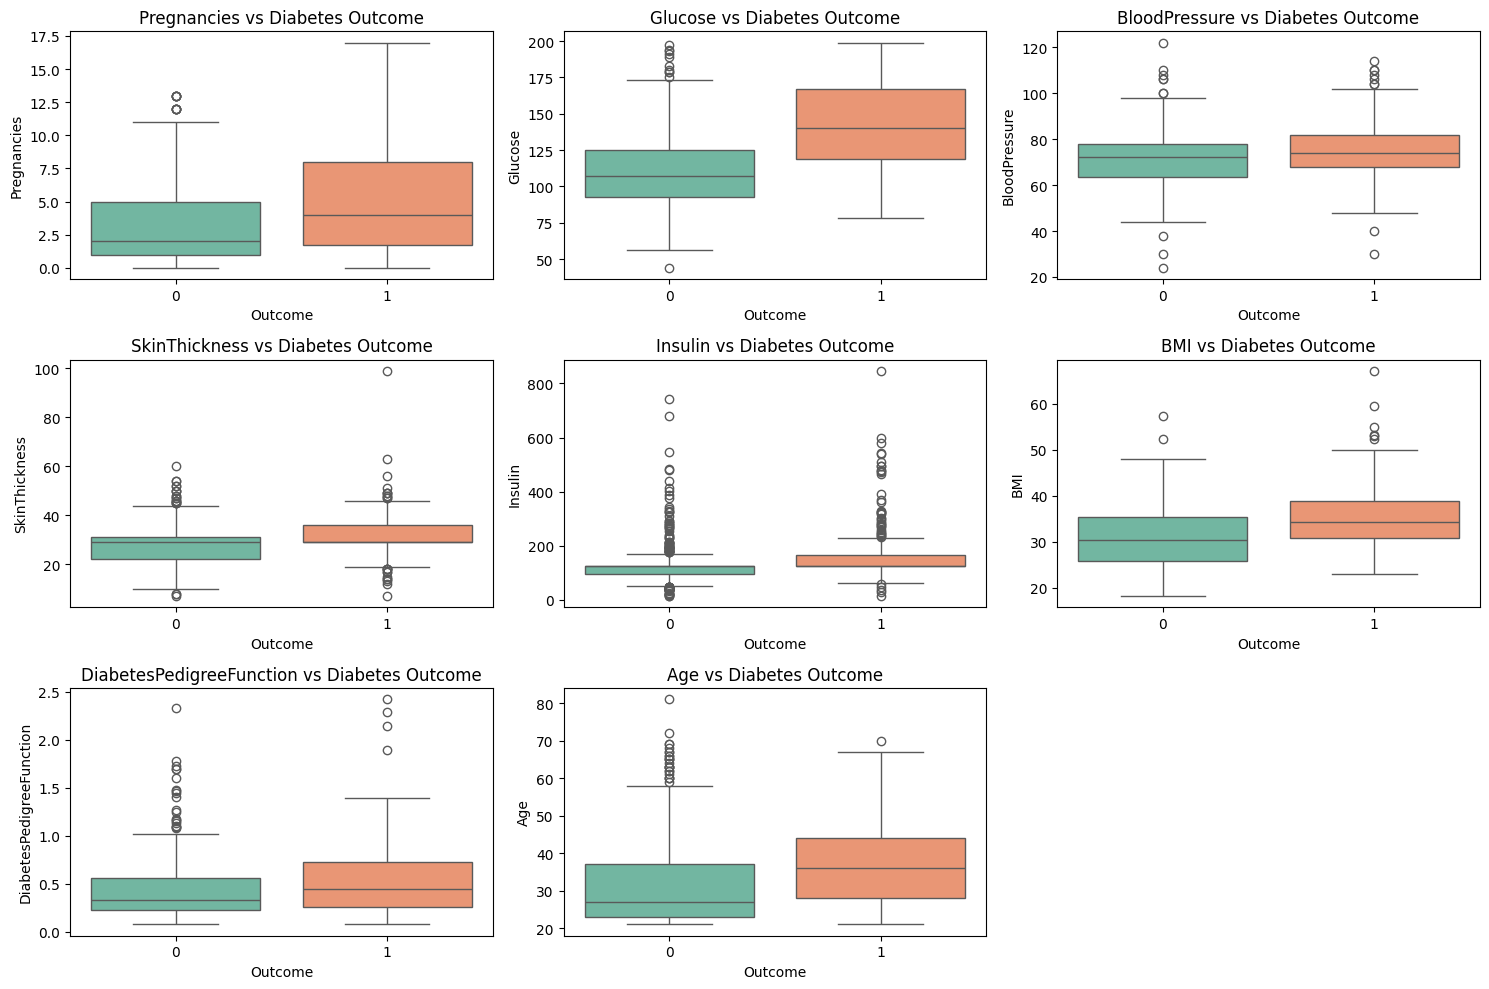

In [23]:
#Diabetes Outcome vs Features (Boxplots)

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Diabetes Outcome')
plt.tight_layout()
plt.show()


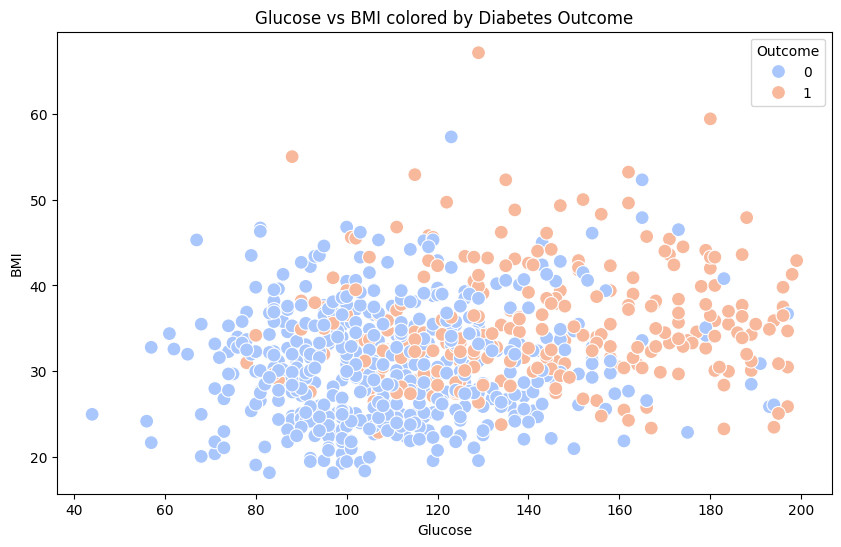

In [24]:
# Scatter Plot with Two Important Features

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', palette='coolwarm', s=100)
plt.title("Glucose vs BMI colored by Diabetes Outcome")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()


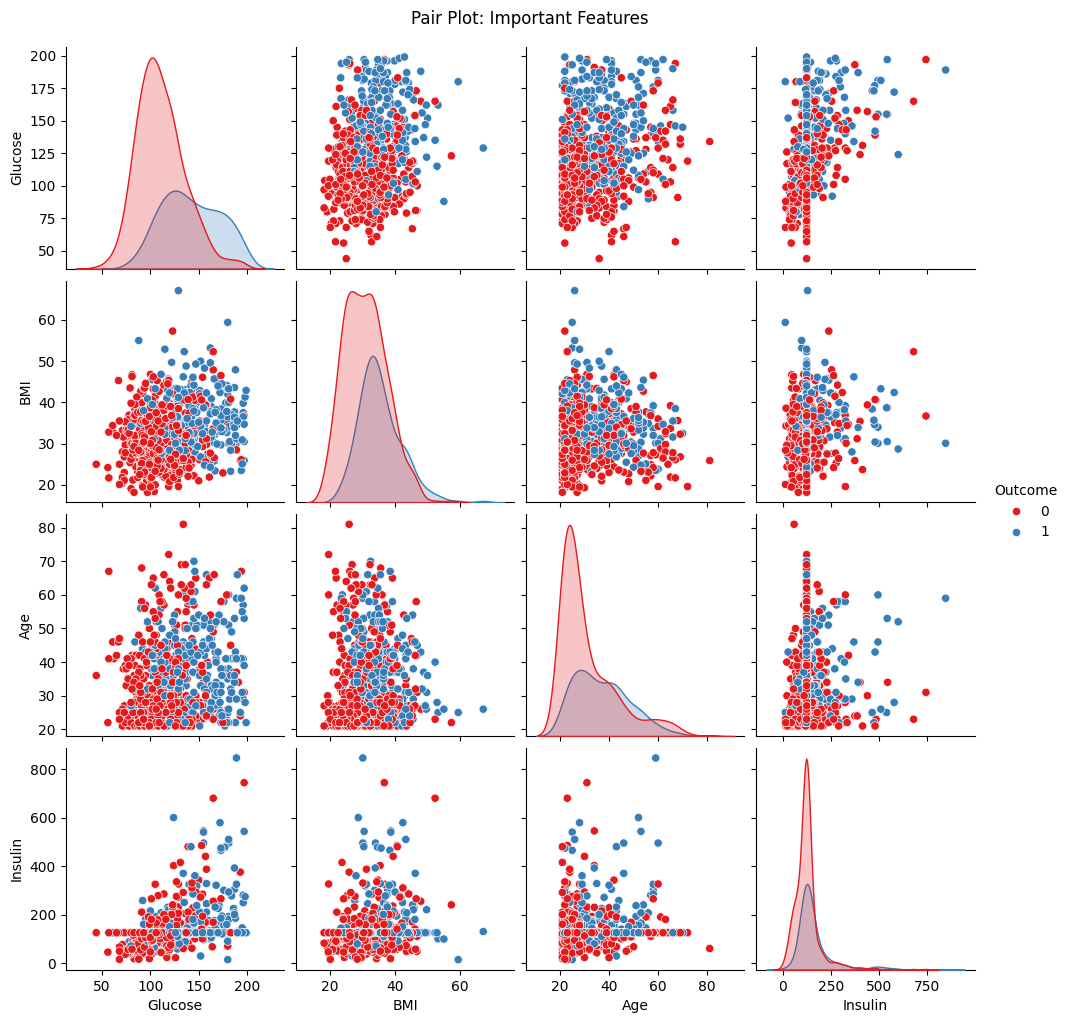

In [25]:
#Pair Plot for Feature Interaction

sns.pairplot(df[['Glucose','BMI','Age','Insulin','Outcome']], hue='Outcome', palette='Set1')
plt.suptitle("Pair Plot: Important Features", y=1.02)
plt.show()


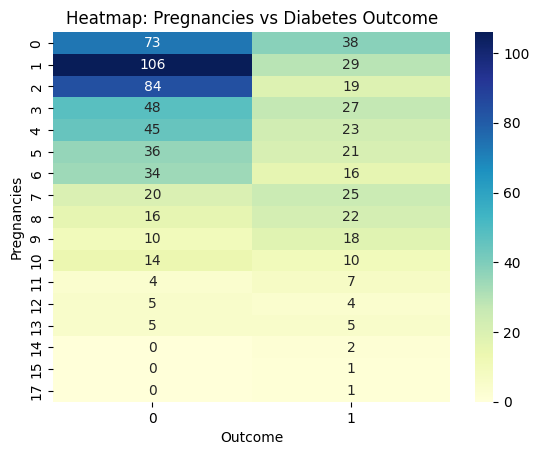

In [26]:
#Correlation Heatmap

pivot_table = df.pivot_table(index='Pregnancies', columns='Outcome', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Pregnancies vs Diabetes Outcome")
plt.show()
